## Assignment

In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'studentsperformance'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sqlalchemy import create_engine


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

performance = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()


In [10]:
# Iterating the columns and removing blank spaces

for c in performance.columns:
    performance.rename(columns={c:c.replace(' ','_')},inplace=True)

performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

_Yes, there are some differences. First impressions are coming from visualizations below. Later I verified my first informal results using statistical test._

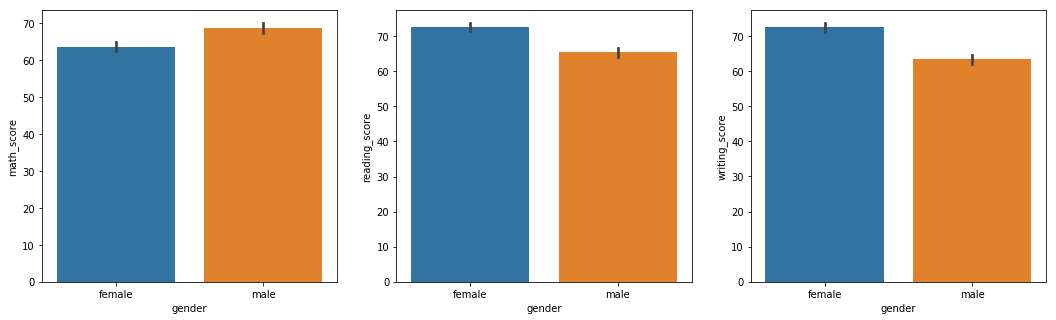

In [26]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

sns.barplot(performance['gender'],performance['math_score'])

plt.subplot(1,3,2)
sns.barplot(performance['gender'],performance['reading_score'])

plt.subplot(1,3,3)
sns.barplot(performance['gender'],performance['writing_score'])

In [27]:
performance.groupby(['gender']).mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


Text(0.5,1,'Writing Scored grouped by Race')

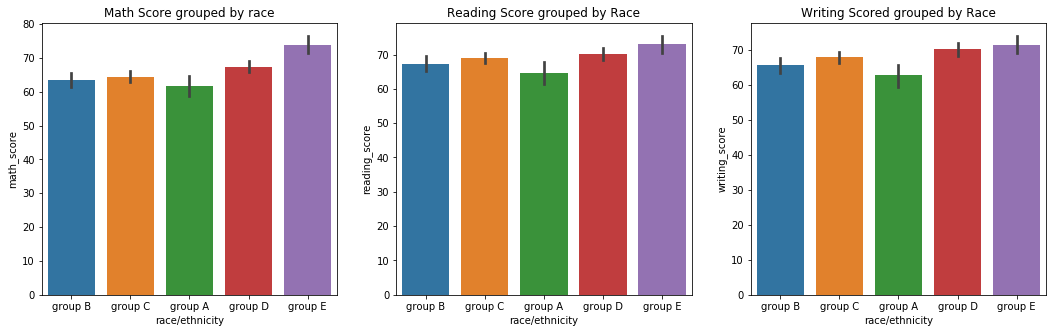

In [89]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(performance['race/ethnicity'],performance['math_score'])
plt.title('Math Score grouped by race')
plt.subplot(1,3,2)
sns.barplot(performance['race/ethnicity'],performance['reading_score'])
plt.title('Reading Score grouped by Race')
plt.subplot(1,3,3)
sns.barplot(performance['race/ethnicity'],performance['writing_score'])
plt.title('Writing Scored grouped by Race')

In [18]:
performance.groupby(['race/ethnicity']).mean()

,math_score,reading_score,writing_score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


Text(0.5,1,'Writint Score grouped by Parent Level of Education')

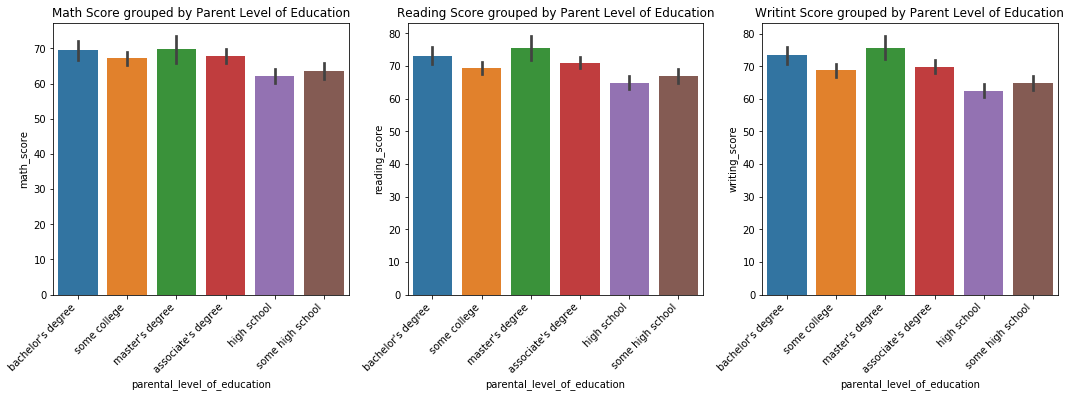

In [38]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(performance['parental_level_of_education'],performance['math_score'])
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Math Score grouped by Parent Level of Education')

plt.subplot(1,3,2)
sns.barplot(performance['parental_level_of_education'],performance['reading_score'])
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Reading Score grouped by Parent Level of Education')

plt.subplot(1,3,3)
sns.barplot(performance['parental_level_of_education'],performance['writing_score'])
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Writint Score grouped by Parent Level of Education')




In [19]:
performance.groupby('parental_level_of_education').mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


**Using groupby I can see:**

- There might not be a significant difference between genders
- There might be some differences in scores based on ethnicities
- There might be some differences on scores based on parent level of education

**Let's verify if said above is true, using statistical test**

In [113]:
#Using statistical test to verify differences between the genders, ethnicities, 
#and parental level of education with respect to their performances in exams

import scipy.stats as stats

def statistic_test(categorical_name,cat_list,continuous_list):
    
    """ Function: statistic_test, calculation for categorical and continuous variables to verify 
                  significant differences betwen them
        Parameters: categorical variable name, list of unique values of categorical variable, list of names of continuous variables
        Return: The result of stats.ttest_ind function   
    """
    
    for continuous_var in continuous_list:

        for i in range(0,len(cat_list)):
            for j in range(i+1,len(cat_list)):
                print('T-test for {},{} regarding to: {} '.format(cat_list[i],cat_list[j],continuous_var))
                results = stats.ttest_ind(
                performance[performance[categorical_name]==cat_list[i]][continuous_var], 
                performance[performance[categorical_name]==cat_list[j]][continuous_var])
                print(results)
                
                #results[1] contains p-value value
                if results[1] < 0.05:
                    print('Statistical significant difference')
                else:
                    print('NO Significant difference')
                    
                print(' ')


#Creating parameters to send to statistic_test function

genders = performance.gender.unique()
races = performance['race/ethnicity'].unique()
parent_education = performance.parental_level_of_education.unique()
continuous_var = ['writing_score','reading_score','math_score']

#Calling statistic_test function for every categorical variable to verify

print('RESULTS OF GENDER')
statistic_test('gender',genders,continuous_var)

RESULTS OF GENDER
T-test for female,male regarding to: writing_score 
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)
Statistical significant difference
 
T-test for female,male regarding to: reading_score 
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
Statistical significant difference
 
T-test for female,male regarding to: math_score 
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
Statistical significant difference
 


In [114]:
print('RESULTS OF RACE')
statistic_test('race/ethnicity',races,continuous_var) 

RESULTS OF RACE
T-test for group B,group C regarding to: writing_score 
Ttest_indResult(statistic=-1.5964963433740407, pvalue=0.1110010959814519)
NO Significant difference
 
T-test for group B,group A regarding to: writing_score 
Ttest_indResult(statistic=1.4624420577998105, pvalue=0.14475374198993884)
NO Significant difference
 
T-test for group B,group D regarding to: writing_score 
Ttest_indResult(statistic=-3.19929333232526, pvalue=0.0014749978881319053)
Statistical significant difference
 
T-test for group B,group E regarding to: writing_score 
Ttest_indResult(statistic=-3.3831978345244518, pvalue=0.0008032300486353951)
Statistical significant difference
 
T-test for group C,group A regarding to: writing_score 
Ttest_indResult(statistic=2.848872404992454, pvalue=0.004610690740740428)
Statistical significant difference
 
T-test for group C,group D regarding to: writing_score 
Ttest_indResult(statistic=-1.8896631516726248, pvalue=0.05930232918708209)
NO Significant difference
 
T-te

In [115]:
print('RESULTS OF PARENT LEVEL OF EDUCATION')
statistic_test('parental_level_of_education',parent_education,continuous_var)
    

RESULTS OF PARENT LEVEL OF EDUCATION
T-test for bachelor's degree,some college regarding to: writing_score 
Ttest_indResult(statistic=2.6803314684632196, pvalue=0.00771101202367254)
Statistical significant difference
 
T-test for bachelor's degree,master's degree regarding to: writing_score 
Ttest_indResult(statistic=-0.9998741306804844, pvalue=0.3187519641464658)
NO Significant difference
 
T-test for bachelor's degree,associate's degree regarding to: writing_score 
Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)
Statistical significant difference
 
T-test for bachelor's degree,high school regarding to: writing_score 
Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)
Statistical significant difference
 
T-test for bachelor's degree,some high school regarding to: writing_score 
Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)
Statistical significant difference
 
T-test for some college,master's degree regardi

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

_Yes, there are significant differences between lunch types respect to their performance in math, reading and writting. I believe feeding is very important. See details below_

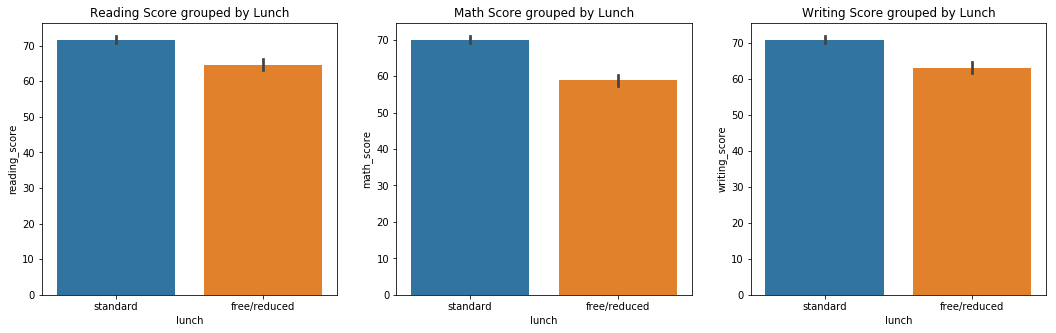

In [112]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(performance['lunch'],performance['reading_score'])
plt.title('Reading Score grouped by Lunch')

plt.subplot(1,3,2)
sns.barplot(performance['lunch'],performance['math_score'])
plt.title('Math Score grouped by Lunch')

plt.subplot(1,3,3)
sns.barplot(performance['lunch'],performance['writing_score'])
plt.title('Writing Score grouped by Lunch')

plt.show()

In [110]:
#Verifying if there are significant differences between the lunch types with respect to their performances in exams

lunchs = performance.lunch.unique()
print('RESULTS OF LUNCHS')
statistic_test('lunch',lunchs,continuous_var)


RESULTS OF LUNCHS
T-test for standard,free/reduced regarding to: writing_score 
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)
Statistical significant difference
 
T-test for standard,free/reduced regarding to: reading_score 
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
Statistical significant difference
 
T-test for standard,free/reduced regarding to: math_score 
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
Statistical significant difference
 


### 3. Does the test preparation course seem to have an effect on the exam performances?

_Yes, for those people who complete a preparation course, their scores were higher. See details below_

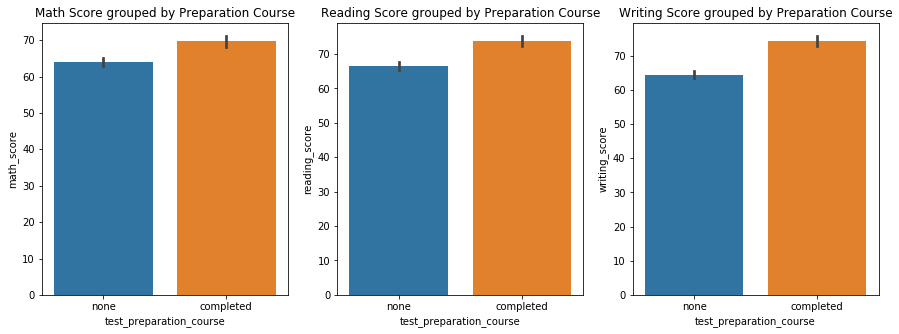

In [124]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(performance['test_preparation_course'],performance['math_score'])
plt.title('Math Score grouped by Preparation Course')

plt.subplot(1,3,2)
sns.barplot(performance['test_preparation_course'],performance['reading_score'])
plt.title('Reading Score grouped by Preparation Course')

plt.subplot(1,3,3)
sns.barplot(performance['test_preparation_course'],performance['writing_score'])
plt.title('Writing Score grouped by Preparation Course')

plt.show()

In [125]:
preparations = performance.test_preparation_course.unique()

print('RESULTS OF PREPARATION COURSE')
statistic_test('test_preparation_course',preparations,continuous_var)


RESULTS OF PREPARATION COURSE
T-test for none,completed regarding to: writing_score 
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)
Statistical significant difference
 
T-test for none,completed regarding to: reading_score 
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
Statistical significant difference
 
T-test for none,completed regarding to: math_score 
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
Statistical significant difference
 


In [118]:
performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 4. Which 2 exam scores are most correlated with each other?

_Reading and writting exams are most correlated. See details below_


In [130]:
correlation_exams = performance.corr()
correlation_exams

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


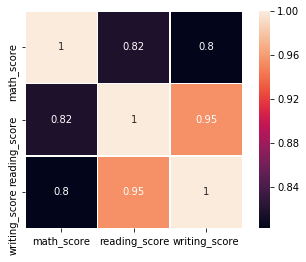

In [131]:
sns.heatmap(correlation_exams, square=True, annot=True, linewidths=.5)